Fetching historical data (2008-Present)...


/tmp/ipython-input-1955740909.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2008-01-01', end='2024-01-01')['Close']
[*********************100%***********************]  5 of 5 completed



--- STRESS TEST RESULTS ---

Scenario: 2008 Financial Crisis
Date Range: 2008-09-01 to 2008-11-20
Portfolio Return: -25.31%
Projected PnL: $-2531.12

Scenario: 2020 COVID-19 Crash
Date Range: 2020-02-19 to 2020-03-23
Portfolio Return: -15.81%
Projected PnL: $-1581.35


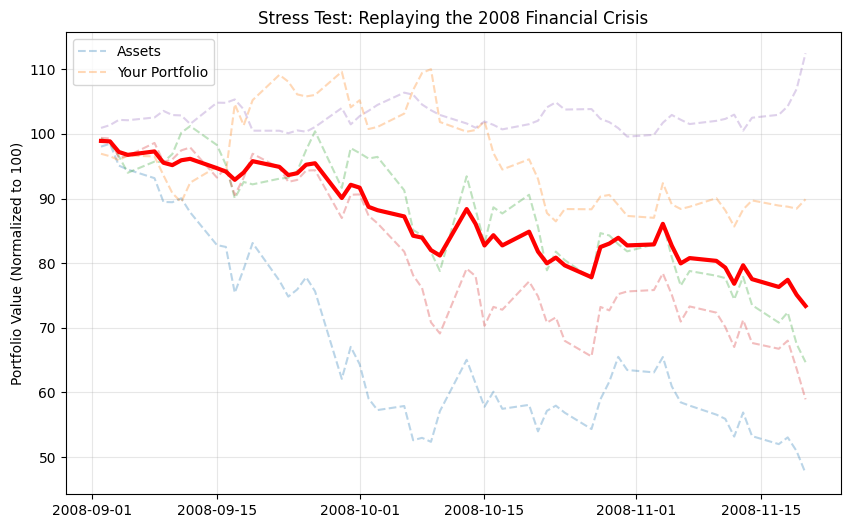

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# --- STEP 1: SETUP PORTFOLIO ---
tickers = ['AAPL', 'MSFT', 'TLT', 'GLD', 'SPY']
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
initial_investment = 10000

# --- STEP 2: FETCH LONG-TERM DATA ---
# We need data going back to 2008 to capture the financial crisis
print("Fetching historical data (2008-Present)...")
data = yf.download(tickers, start='2008-01-01', end='2024-01-01')['Close']

# Calculate Daily Returns
returns = data.pct_change().dropna()

# --- STEP 3: DEFINE STRESS SCENARIOS ---
# We define the specific date ranges of famous crashes
scenarios = {
    '2008 Financial Crisis': ('2008-09-01', '2008-11-20'),
    '2020 COVID-19 Crash': ('2020-02-19', '2020-03-23')
}

print("\n--- STRESS TEST RESULTS ---")

for name, (start, end) in scenarios.items():
    # 1. Slice the data for the crash period
    crash_data = returns.loc[start:end]

    # 2. Calculate the Cumulative Return for each asset during the crash
    # Formula: (1 + r1) * (1 + r2) ... - 1
    cumulative_returns = (1 + crash_data).prod() - 1

    # 3. Calculate Portfolio Performance
    # We apply our CURRENT weights to the OLD crash returns
    portfolio_crash_return = np.dot(weights, cumulative_returns)
    portfolio_loss = initial_investment * portfolio_crash_return

    print(f"\nScenario: {name}")
    print(f"Date Range: {start} to {end}")
    print(f"Portfolio Return: {portfolio_crash_return:.2%}")
    print(f"Projected PnL: ${portfolio_loss:.2f}")

# --- STEP 4: VISUALIZATION ---
# Let's compare the asset performance in 2008 vs. Portfolio
scenario_name = '2008 Financial Crisis'
start, end = scenarios[scenario_name]
crash_data = returns.loc[start:end]

# Normalize to 100 to see the drop
normalized_prices = (1 + crash_data).cumprod() * 100
portfolio_curve = (1 + crash_data.dot(weights)).cumprod() * 100

plt.figure(figsize=(10, 6))
plt.plot(normalized_prices.index, normalized_prices, alpha=0.3, linestyle='--') # Individual Assets
plt.plot(normalized_prices.index, portfolio_curve, color='red', linewidth=3, label='Your Portfolio') # Your Portfolio

plt.title(f'Stress Test: Replaying the {scenario_name}')
plt.ylabel('Portfolio Value (Normalized to 100)')
plt.legend(['Assets', 'Your Portfolio'])
plt.grid(True, alpha=0.3)
plt.savefig('day9_stress_test.png')
plt.show()